# NCI Data Access: Python GeoTIFF

**The following will go through how to:** <br \>
   1. Read and extract data from an example raster (.tif) file using Rasterio and GDAL. 
   2. Simple plotting of extracted data
   3. More advanced plotting using `Cartopy` and creating RGB images


## Load required modules if working on Raijin and/or the VDI (Virtual Desktop Infrastructure)
Additional modules are needed for some of the python libraries used in this example. 

```
$ module load python/2.7.5 gdal/1.11.1-python proj/4.8.0

$ module list

Currently Loaded Modulefiles:
  1) python/2.7.5         2) gdal/1.11.1-python   3) proj/4.8.0       
 
```

**Note:** If using a python virtual environment, these modules must be loaded before activating the working environment. 

## Load required python libraries

**Note:** Rasterio is not part of any Raijin/VDI modules and has to be installed by the user. 

In [1]:
import numpy as np
import rasterio
from osgeo import gdal
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fileFC = '/g/data2/rs0/tiles/EPSG4326_1deg_0.00025pixel/LS8_OLI/116_-034/2015/LS8_OLI_FC_116_-034_2015-03-02T02-05-26.tif'

## Rasterio example (uses GDAL)
For more info on Rasterio: https://pypi.python.org/pypi/rasterio


In [3]:
fc = rasterio.open(fileFC)
fc.meta

{'affine': Affine(0.00025, 0.0, 116.0,
       0.0, -0.00025, -33.0),
 'count': 4,
 'crs': {'init': u'epsg:4326'},
 'driver': u'GTiff',
 'dtype': 'int16',
 'height': 4000,
 'nodata': -999.0,
 'transform': (116.0, 0.00025, 0.0, -33.0, 0.0, -0.00025),
 'width': 4000}

In [4]:
print "Number of bands: ", fc.count

Number of bands:  4


In [5]:
print "Height:\t ", fc.height
print "Width:\t ", fc.width
print "CRS:\t ", fc.crs

Height:	  4000
Width:	  4000
CRS:	  {'init': u'epsg:4326'}


In [6]:
print "BoundingBox: ", fc.bounds

BoundingBox:  BoundingBox(left=116.0, bottom=-34.0, right=117.0, top=-33.0)


### Extract (read) and plot a selected band

In [7]:
data = fc.read(3)

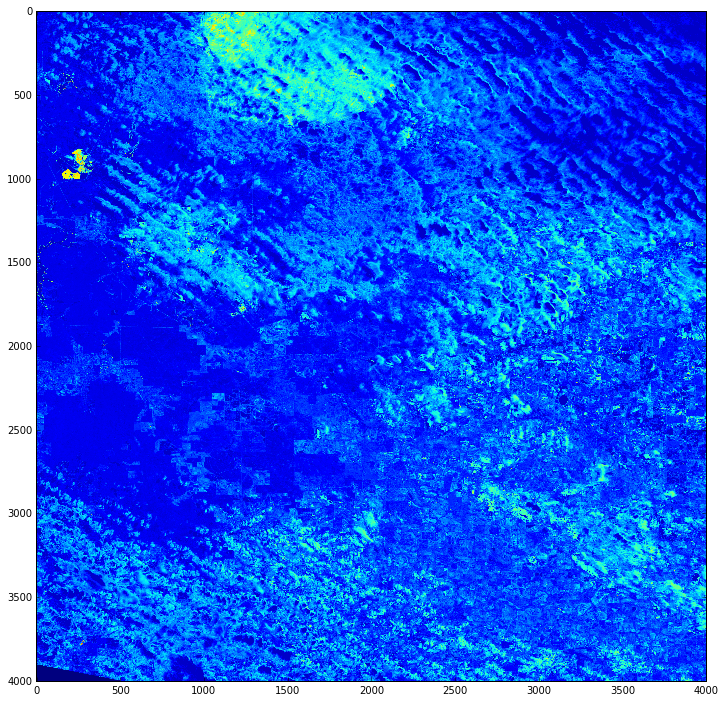

In [8]:
fig = plt.figure(figsize=(12,12))
plt.imshow(data)

### Extract only a small subset

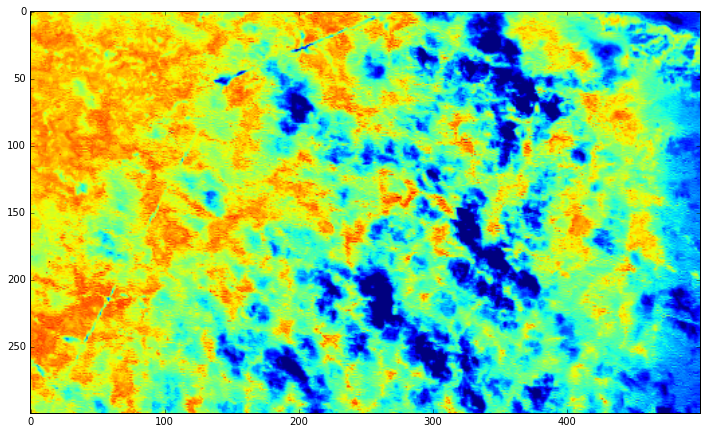

In [9]:
small_data = fc.read(1, window=((200, 500), (500, 1000)))
fig = plt.figure(figsize=(12,12))
plt.imshow(small_data)

## GDAL example

In [10]:
fc2 = gdal.Open(fileFC)

In [11]:
cols = fc2.RasterXSize
rows = fc2.RasterYSize
bands = fc2.RasterCount

print "Cols: {0}, Rows: {1}, Bands: {2}".format(cols, rows, bands)

Cols: 4000, Rows: 4000, Bands: 4


In [12]:
transform = fc2.GetGeoTransform()
xOrigin = transform[0]
yOrigin = transform[3]
pixelWidth = transform[1]
pixelHeight = transform[5]

In [13]:
print "Origin (X, Y): ", xOrigin, yOrigin
print "Transform: ", transform

Origin (X, Y):  116.0 -33.0
Transform:  (116.0, 0.00025, 0.0, -33.0, 0.0, -0.00025)


#### What these transform values mean:
```
transform[0] /* top left x */
transform[1] /* w-e pixel resolution */
transform[2] /* rotation, 0 if image is "north up" */
transformm[3] /* top left y */
transform[4] /* rotation, 0 if image is "north up" */
transform[5] /* n-s pixel resolution */ ```

In [14]:
band = fc2.GetRasterBand(3).ReadAsArray()

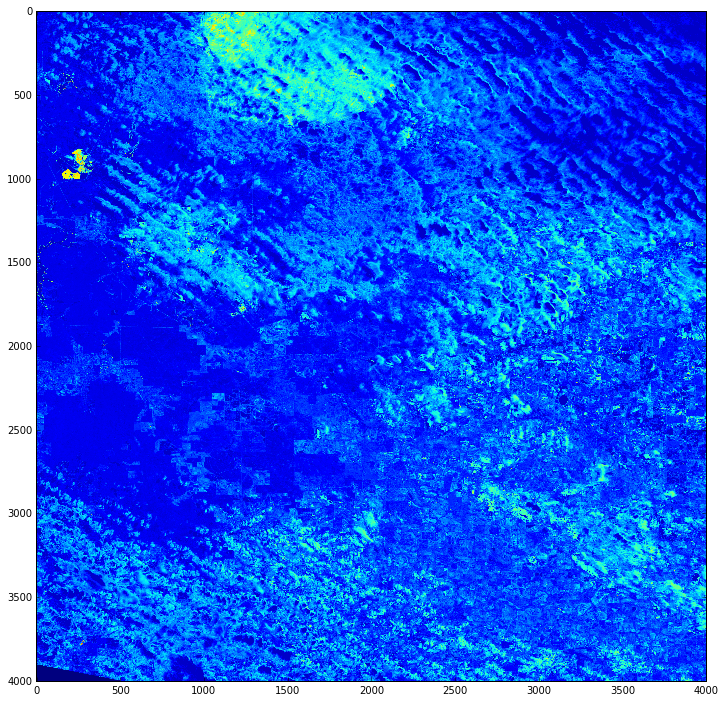

In [15]:
fig = plt.figure(figsize=(12,12))
plt.imshow(band)

## Cartopy plotting
For more info on Cartopy: http://scitools.org.uk/cartopy/

**Note:** Cartopy needs the `proj` module if working on the Virtual Desktop Infrastructure (VDI). If using within a virtual environment, this must be loaded before activating the working environment. 
```
$ module load proj ```

In [16]:
import cartopy.crs as ccrs

In [17]:
img = fc.read(3)
img.shape

(4000, 4000)

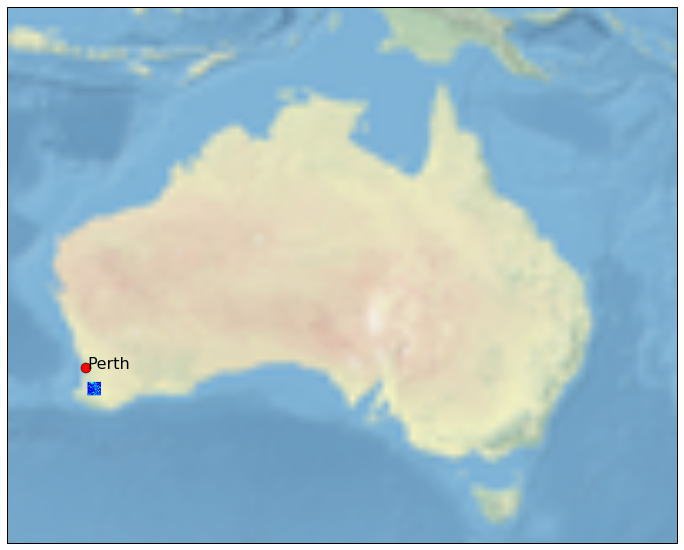

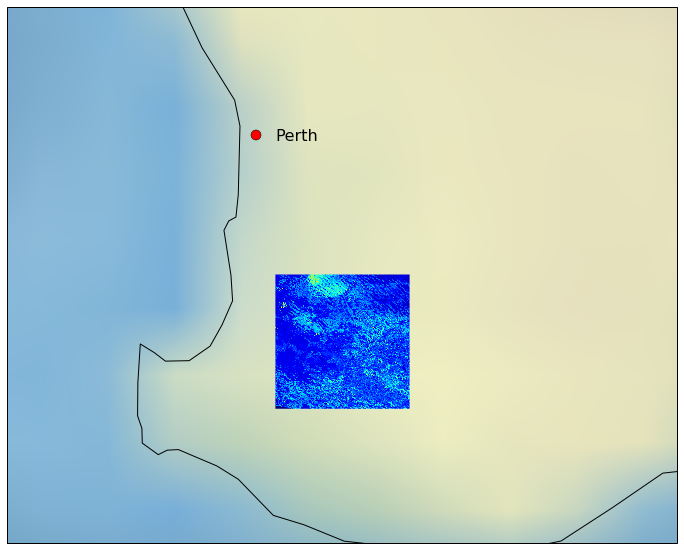

In [19]:
img_extent = (116.0, 117.0, -34, -33)


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
ax.plot(115.8589, -31.9522, 'ro', markersize=10)
ax.text(116, -32, 'Perth', fontsize=16)

ax.set_xlim([110, 160])
ax.set_ylim([-45, -5])

fig2 = plt.figure(figsize=(12,12))
ax2 = plt.axes(projection=ccrs.PlateCarree())

ax2.stock_img()
ax2.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
ax2.plot(115.8589, -31.9522, 'ro', markersize=10)
ax2.text(116, -32, 'Perth', fontsize=16)

ax2.set_xlim([114, 119])
ax2.set_ylim([-35, -31])

ax2.coastlines(resolution='50m', color='black', linewidth=1)

## Plotting RGB images
For more info on common band combinations: http://landsat.usgs.gov/L8_band_combos.php

In [20]:
import numpy as np

#### Open file

In [21]:
fileNBAR = '/g/data2/rs0/tiles/EPSG4326_1deg_0.00025pixel/LS8_OLI/116_-034/2015/LS8_OLI_NBAR_116_-034_2015-03-02T02-05-26.tif'

nbar = rasterio.open(fileNBAR)
print "Number of bands: ", nbar.count

Number of bands:  7


#### Read in bands
**Note**: Bands must be clipped (value of 6000 was chosen in this case) and scaled to values between (0, 255) to plot as RGB image.

In [22]:
band7 = nbar.read(7).clip(0, 6000) / 6000. * 255
band6 = nbar.read(6).clip(0, 6000) / 6000. * 255
# band5 = nbar.read(5).clip(0, 6000) / 6000. * 255
band4 = nbar.read(4).clip(0, 6000) / 6000. * 255
# band3 = nbar.read(3).clip(0, 6000) / 6000. * 255
# band2 = nbar.read(2).clip(0, 6000) / 6000. * 255

#### Combine the bands of interest into numpy NxNx3 dimensional array
**Note**: The data type must be converted to 'uint8' to plot as image

In [23]:
rgb = np.stack((band7, band6, band4), axis=2).astype('uint8')

print "New array shape: {0}, dtype: {1}".format(rgb.shape, rgb.dtype)

New array shape: (4000, 4000, 3), dtype: uint8


#### Plot array

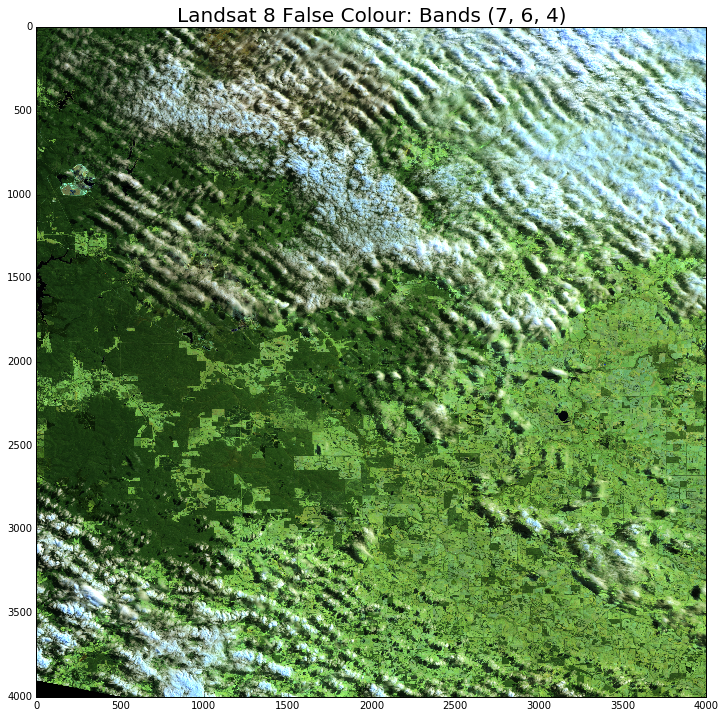

In [24]:
plt.figure(figsize=(12,12))
plt.imshow(rgb)
plt.title('Landsat 8 False Colour: Bands (7, 6, 4)', fontsize=20)

#### Use Cartopy to plot again on map

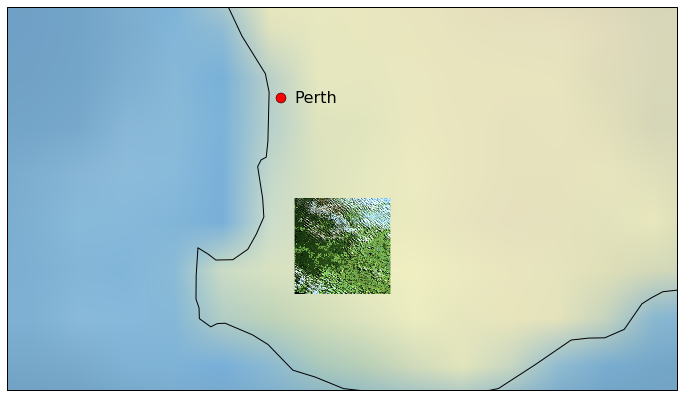

In [25]:
fig = plt.figure(figsize=(12,12))
img_extent = (116.0, 117.0, -34, -33)

ax = plt.axes(projection=ccrs.PlateCarree())

ax.stock_img()
ax.imshow(rgb, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
ax.plot(115.8589, -31.9522, 'ro', markersize=10)
ax.text(116, -32, 'Perth', fontsize=16)

ax.set_xlim([113, 120])
ax.set_ylim([-35, -31])

ax.coastlines(resolution='50m', color='black', linewidth=1)

In [26]:
nbar.close()
fc.close()